# <center>Iris Species Classification</center>
<div style="width:100%;text-align: center;"> <img align = middle src="https://hellor.netlify.app/slides/iris_flower_dataset.png" style="height:300px;"> </div>

# About the Dataset
Description of the data given:
- **Id**: Unique number for each row
- **SepalLengthCm**: Length of the sepal (in cm)
- **SepalWidthCm**: Width of the sepal (in cm)
- **PetalLengthCm**: Length of the petal (in cm)
- **PetalWidthCm**: Width of the petal (in cm)
- **Species**: Name of the species

# Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

<h3>Taking a look at the input files</h3>

<h3>Reading the input file</h3>

In [ ]:
df = pd.read_csv('Iris_data.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,NaN,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,NaN,1.4,0.2,Iris-setosa


<h3>Lets take a look at the information in our dataset</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             151 non-null    int64  
 1   SepalLengthCm  143 non-null    float64
 2   SepalWidthCm   146 non-null    float64
 3   PetalLengthCm  145 non-null    float64
 4   PetalWidthCm   149 non-null    float64
 5   Species        145 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<h3>Looking at the statistics of our dataset</h3>

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,151.000000,143.000000,146.000000,145.000000,149.000000
mean,75.046358,5.862937,3.047260,3.792414,1.186577
std,43.657659,0.825447,0.433462,1.750876,0.767204
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,37.500000,5.100000,2.800000,1.600000,0.300000
50%,75.000000,5.800000,3.000000,4.400000,1.300000
75%,112.500000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h3>Lets check for any missing values in the dataset</h3>

In [ ]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
Id               0
SepalLengthCm    8
SepalWidthCm     5
PetalLengthCm    6
PetalWidthCm     2
Species          6
dtype: int64
------------------------------
Total missing values are: 27
------------------------------


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,8
SepalWidthCm,5
PetalLengthCm,6
PetalWidthCm,2
Species,6


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Removing the `Id` column from our dataset as it is not needed to peform EDA (Exploratory Data Analysis).

In [ ]:
df.drop(columns = ['Id'], axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa


Taking a look at the different types of `Species` and counting the total number of unique values so that we can look the class distribution of our dataset.

In [ ]:
print("The different Species in the dataset are:", df['Species'].unique())
print("The total number of unique species are:", df['Species'].nunique())

The different Species in the dataset are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The total number of unique species are: 3


# Exploratory Data Analysis
We should try to visualize the distribution of the `Species` in our dataset to see if the classes are balanced.

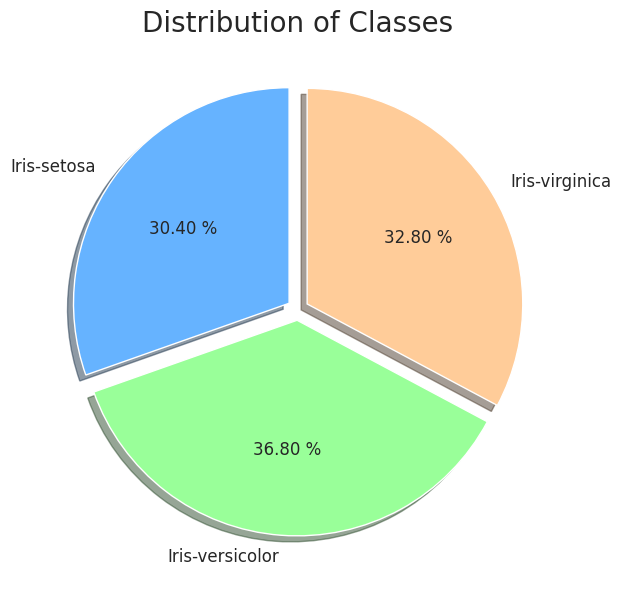

In [ ]:
count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())

colors = ['#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize = (10, 7))
plt.pie(count_list,
        labels = label_list,
        autopct = "%.2f %%",
        startangle = 90,
        explode = (0.05, 0.05, 0.05),
        textprops = {'fontsize': 12},
        colors = colors,
        shadow=True)

plt.title('Distribution of Classes', fontsize = 20)
plt.show()

The classes are equally balanced. Now, let us look at the count of each flower type in our dataset.

In [ ]:
print("The distribution of the classes is:\n", df['Species'].value_counts(), sep = "")

The distribution of the classes is:
Species
Iris-versicolor    46
Iris-virginica     41
Iris-setosa        38
Name: count, dtype: int64


# Univariate Analysis
Univariate analysis is the simplest form of analyzing data. We only take a single variable into consideration and try to find relations based on that.

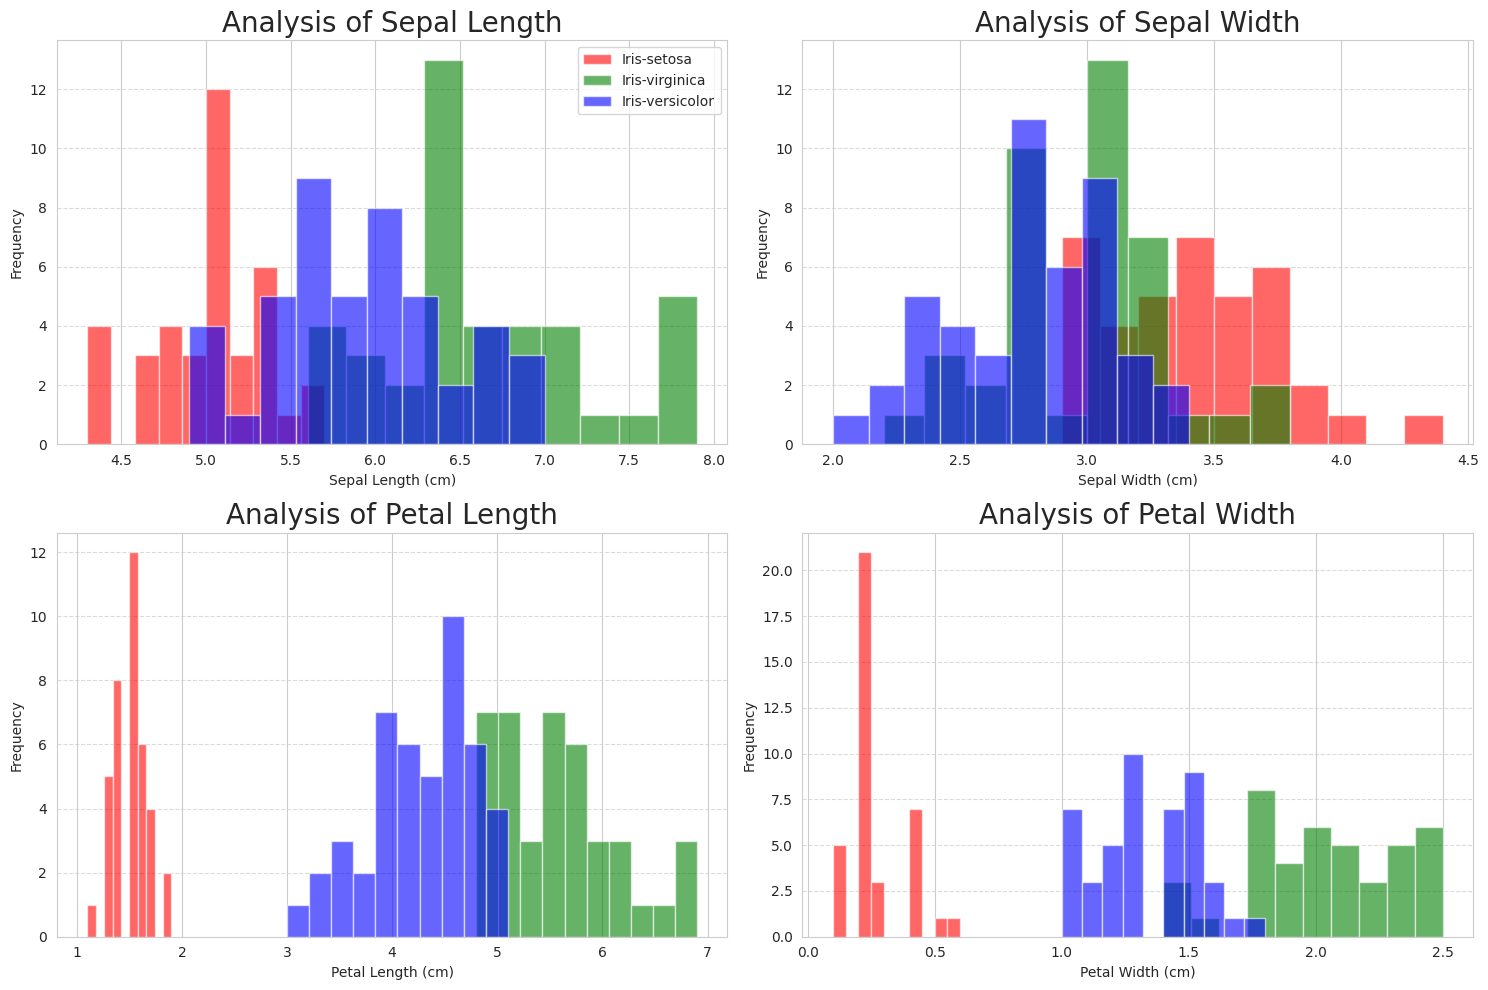

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(df[df['Species'] == 'Iris-setosa']['SepalLengthCm'], bins=10, color='red', alpha=0.6, label='Iris-setosa')
ax1.hist(df[df['Species'] == 'Iris-virginica']['SepalLengthCm'], bins=10, color='green', alpha=0.6, label='Iris-virginica')
ax1.hist(df[df['Species'] == 'Iris-versicolor']['SepalLengthCm'], bins=10, color='blue', alpha=0.6, label='Iris-versicolor')
ax1.set_title('Analysis of Sepal Length', size=20)
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()

ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(df[df['Species'] == 'Iris-setosa']['SepalWidthCm'], bins=10, color='red', alpha=0.6)
ax2.hist(df[df['Species'] == 'Iris-virginica']['SepalWidthCm'], bins=10, color='green', alpha=0.6)
ax2.hist(df[df['Species'] == 'Iris-versicolor']['SepalWidthCm'], bins=10, color='blue', alpha=0.6)
ax2.set_title('Analysis of Sepal Width', size=20)
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df[df['Species'] == 'Iris-setosa']['PetalLengthCm'], bins=10, color='red', alpha=0.6)
ax3.hist(df[df['Species'] == 'Iris-virginica']['PetalLengthCm'], bins=10, color='green', alpha=0.6)
ax3.hist(df[df['Species'] == 'Iris-versicolor']['PetalLengthCm'], bins=10, color='blue', alpha=0.6)
ax3.set_title('Analysis of Petal Length', size=20)
ax3.set_xlabel('Petal Length (cm)')
ax3.set_ylabel('Frequency')
ax3.grid(axis='y', linestyle='--', alpha=0.7)

ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(df[df['Species'] == 'Iris-setosa']['PetalWidthCm'], bins=10, color='red', alpha=0.6)
ax4.hist(df[df['Species'] == 'Iris-virginica']['PetalWidthCm'], bins=10, color='green', alpha=0.6)
ax4.hist(df[df['Species'] == 'Iris-versicolor']['PetalWidthCm'], bins=10, color='blue', alpha=0.6)
ax4.set_title('Analysis of Petal Width', size=20)
ax4.set_xlabel('Petal Width (cm)')
ax4.set_ylabel('Frequency')
ax4.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observations**:
 - `SepalLengthCm`: Iris-setosa has the smallest sepal length. We can see an outlier (red dot) in the graph. Iris-versicolor has a sepal length of about 5 cm to 7 cm. Iris-virginica has the largest sepal length (above 7 cm).
 - `SepalWidthCm`: Iris-versicolor has the smallest sepal width. The distinction between setosa and virginica is not so prominent in the range of 3.5 cm to 4 cm. However for a sepal width equal to or greater than 4 cm all the flowers belong to the Iris-setosa species.
 - `PetalLengthCm`: Iris-setosa has the smallest petal length. The length of the petals do not exceed 2 cm. For Iris-versicolor the petal length is in the range of 3 cm to 5 cm. Iris-virginica has the largest petal length (5 cm or greater).
 - `PetalWidthCm`: Iris-setosa has the smallest petal width. Iris-versicolor has a petal length from 1 cm to slightly less than 2 cm. Iris-virginica has a petal width that is approximately greater than 1.8 cm.

Boxplots are a standardized way of displaying the distribution of data.
**To know more about boxplots you can visit this link: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51**
<div style="width:100%;text-align: center;"> <img align = left src="https://datavizcatalogue.com/methods/images/anatomy/box_plot.png" style="height:600px;"> </div>

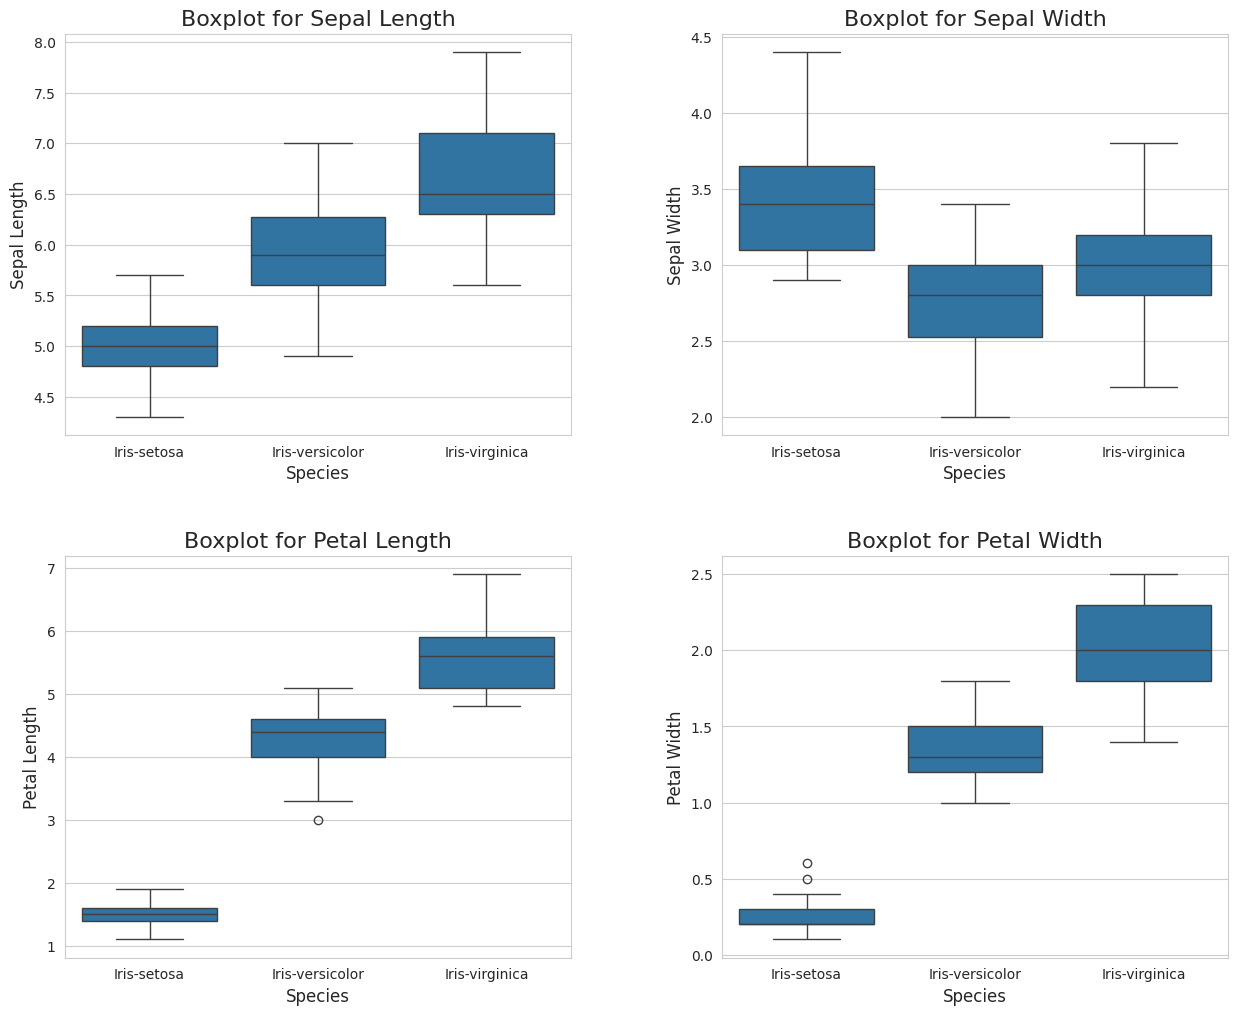

In [ ]:
plt.figure(figsize=(15, 12))

def create_boxplot(feature, ax):
    sns.boxplot(data=df, x='Species', y=feature, ax=ax)

    feature_labels = {
        'SepalLengthCm': 'Sepal Length',
        'SepalWidthCm': 'Sepal Width',
        'PetalLengthCm': 'Petal Length',
        'PetalWidthCm': 'Petal Width'
    }

    ax.set_title(f'Boxplot for {feature_labels[feature]}', fontsize=16)
    ax.set_xlabel('Species', fontsize=12)
    ax.set_ylabel(feature_labels[feature], fontsize=12)

gs = plt.GridSpec(2, 2, figure=plt.gcf(), wspace=0.3, hspace=0.3)

ax1 = plt.subplot(gs[0, 0])
create_boxplot('SepalLengthCm', ax1)

ax2 = plt.subplot(gs[0, 1])
create_boxplot('SepalWidthCm', ax2)

ax3 = plt.subplot(gs[1, 0])
create_boxplot('PetalLengthCm', ax3)

ax4 = plt.subplot(gs[1, 1])
create_boxplot('PetalWidthCm', ax4)

plt.show()

**Observations**:
 - `SepalLengthCm`: The median value for sepal length is the least for Iris-setosa and the most for Iris-virginica.
 - `SepalWidthCm`: The median value for sepal width is the least for Iris-versicolor and the largest for Iris-setosa. Based on the sepal width of the flowers it might be tough to differentiate between the 3 species.
 - `PetalLengthCm`: Visually it is very evident that Iris-setosa has the least petal length. Even though there are a few outliers all of them are less than 2 cm. Iris-versicolor has the second largest median petal length, whereas Iris-virginica has the largest median petal length.
 - `PetalWidthCm`: Similar to the petal lengths of the species, we can see that Iris-setosa has the lowest median petal width, whereas Iris-virginica has the largest median petal width.

# Bivariate Analysis
Bivariate analysis is a form of statistical analysis. It involves the analysis of two variables for the purpose of determining the relationship between them.

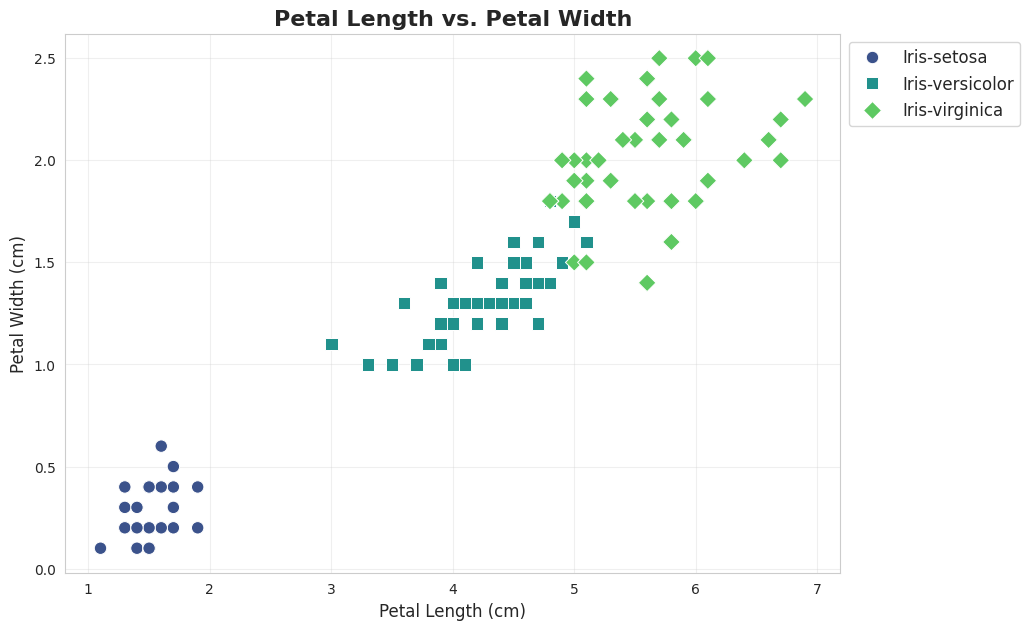

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    data=df,
    style="Species",
    markers=["o", "s", "D"],
    s=80,
    palette="viridis",
)

plt.legend(
    bbox_to_anchor=(1, 1), loc="upper left", fontsize=12
)
plt.title("Petal Length vs. Petal Width", fontsize=16, fontweight="bold")
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)
plt.grid(alpha=0.3)

plt.show()

We can see that the petal length and petal width is the least for Iris-setosa. The petal width and length for Iris-versicolor lies in an intermediate range, between that of setosa and virginica. Iris-virginica has the largest petal length and width. A few outliers exist in the case of both versicolor and virginica.

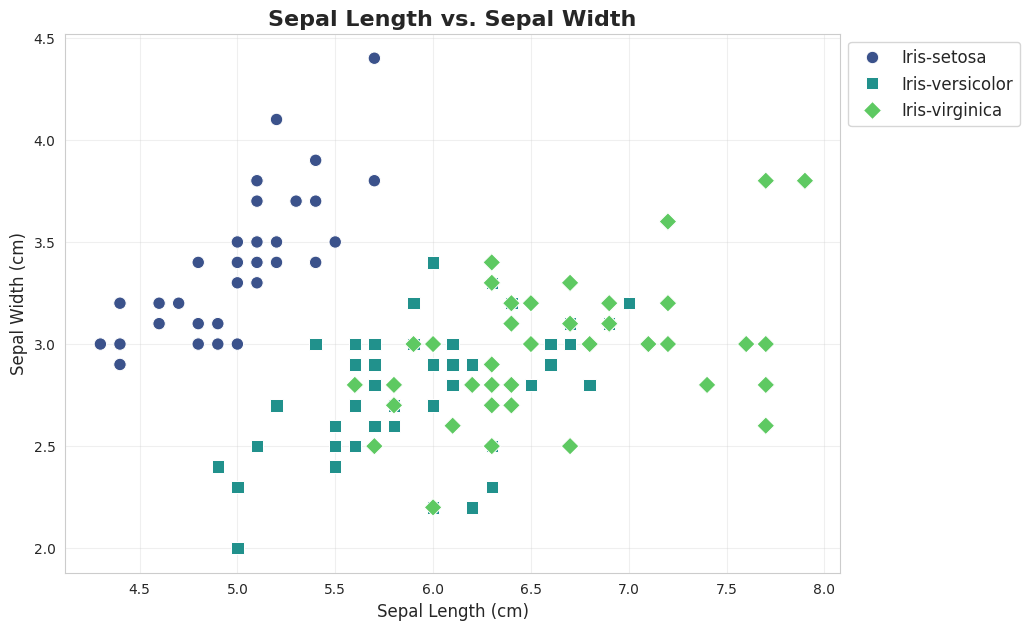

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species",
    data=df,
    style="Species",
    markers=["o", "s", "D"],
    s=80,
    palette="viridis",
)

plt.legend(
    bbox_to_anchor=(1, 1), loc="upper left", fontsize=12
)
plt.title("Sepal Length vs. Sepal Width", fontsize=16, fontweight="bold")
plt.xlabel("Sepal Length (cm)", fontsize=12)
plt.ylabel("Sepal Width (cm)", fontsize=12)
plt.grid(alpha=0.3)

plt.show()

We can observe that Iris-setosa has a relatively lower sepal length (as compared to versicolor or virginica). Iris-setosa has a large sepal width. It is hard to distinguish between versicolor and virginica based on sepal length and width.

# Multivariate Analysis
It refers to an analysis involving multiple dependent variables resulting in one outcome. Creating different graphs for all the features to perform bivariate analysis would be extremely tedious. Seaborn provides a convenient way to perform multivariate analysis using the `pairplot` function.

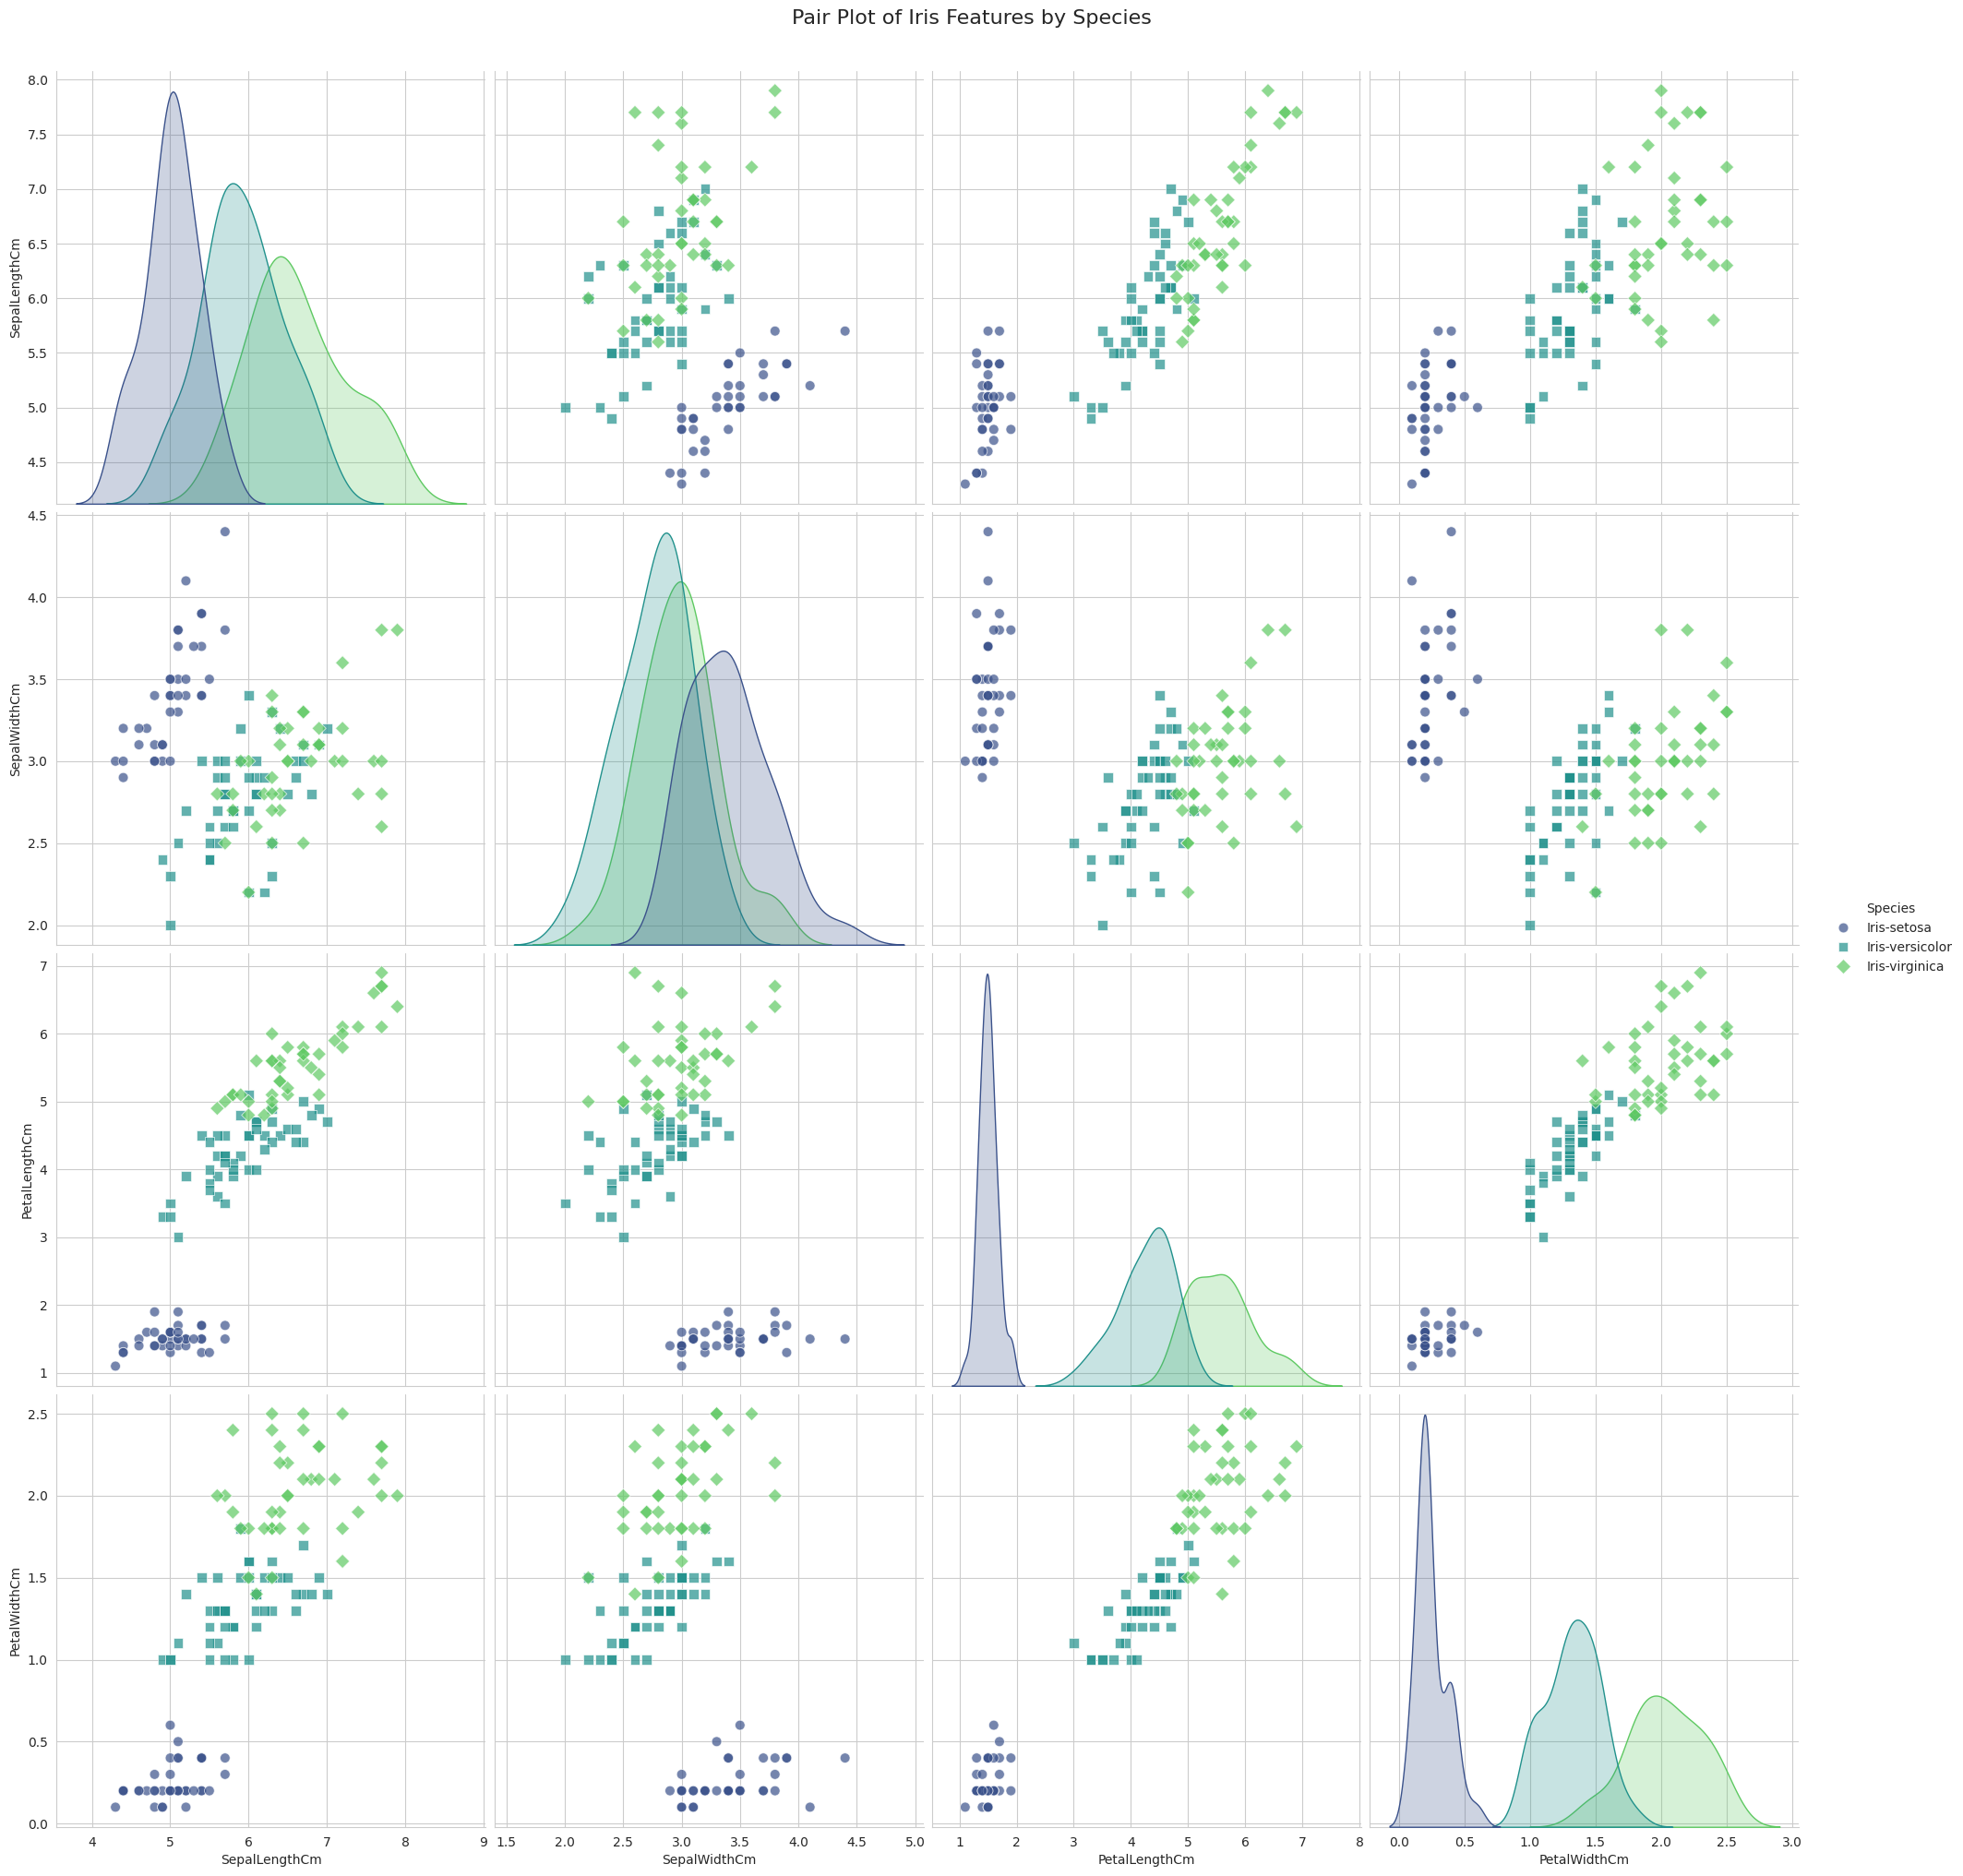

In [ ]:
sns.pairplot(df, hue='Species', height=5,
             diag_kind='kde',
             markers=["o", "s", "D"],
             palette="viridis",
             plot_kws={'alpha': 0.7, 's': 60})

plt.suptitle("Pair Plot of Iris Features by Species", y=1.02, fontsize=16)
plt.show()

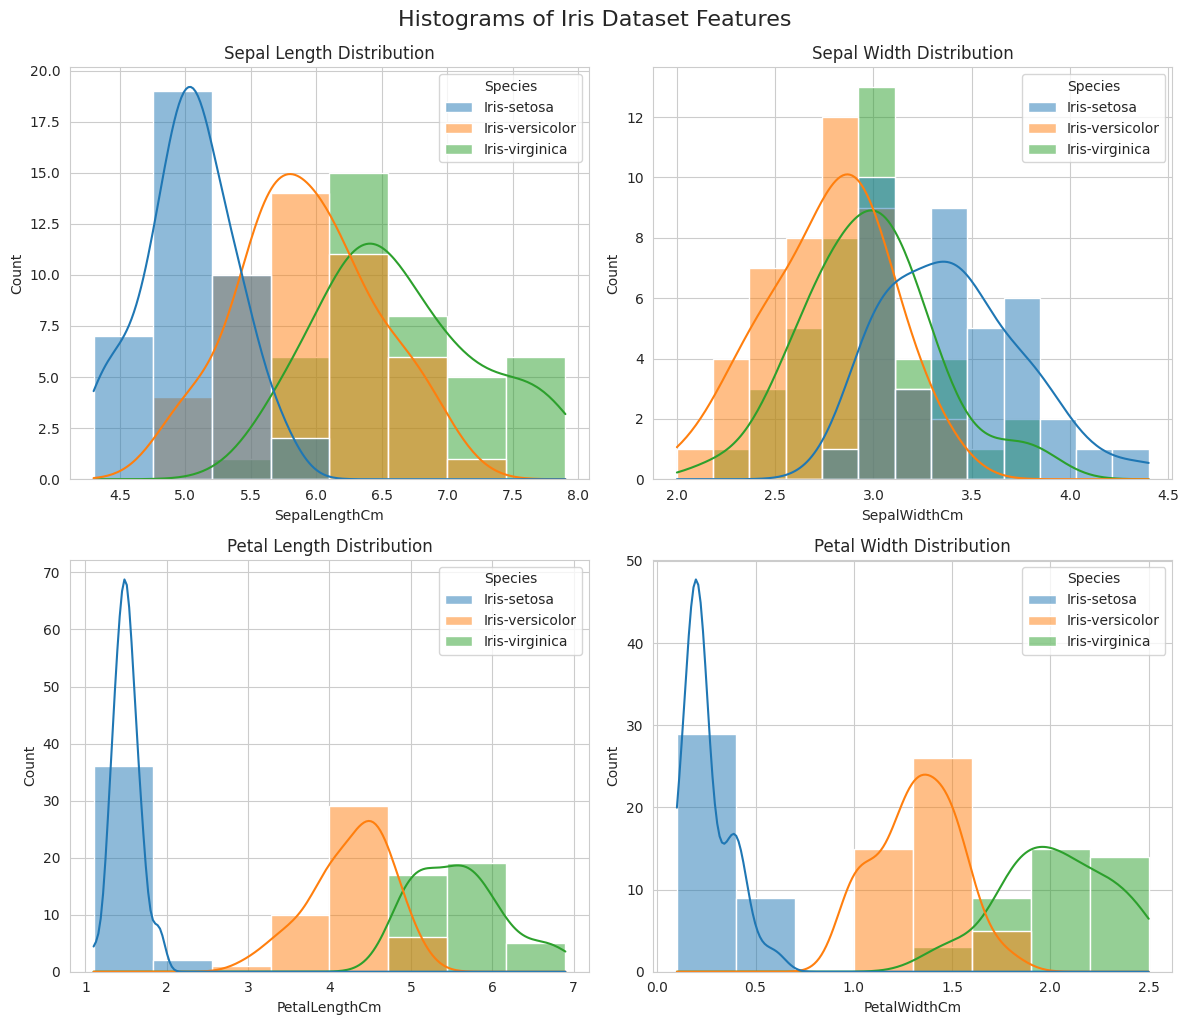

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df, x='SepalLengthCm', hue='Species', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='SepalWidthCm', hue='Species', kde=True, ax=axes[0, 1])
sns.histplot(data=df, x='PetalLengthCm', hue='Species', kde=True, ax=axes[1, 0])
sns.histplot(data=df, x='PetalWidthCm', hue='Species', kde=True, ax=axes[1, 1])

axes[0, 0].set_title('Sepal Length Distribution')
axes[0, 1].set_title('Sepal Width Distribution')
axes[1, 0].set_title('Petal Length Distribution')
axes[1, 1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.suptitle('Histograms of Iris Dataset Features', fontsize=16, y=1.02)
plt.show()

# 3D Visualization
3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes. **To learn about plotting 3D scatter plots using matplot you can visit this link: https://pythonguides.com/matplotlib-3d-scatter/**

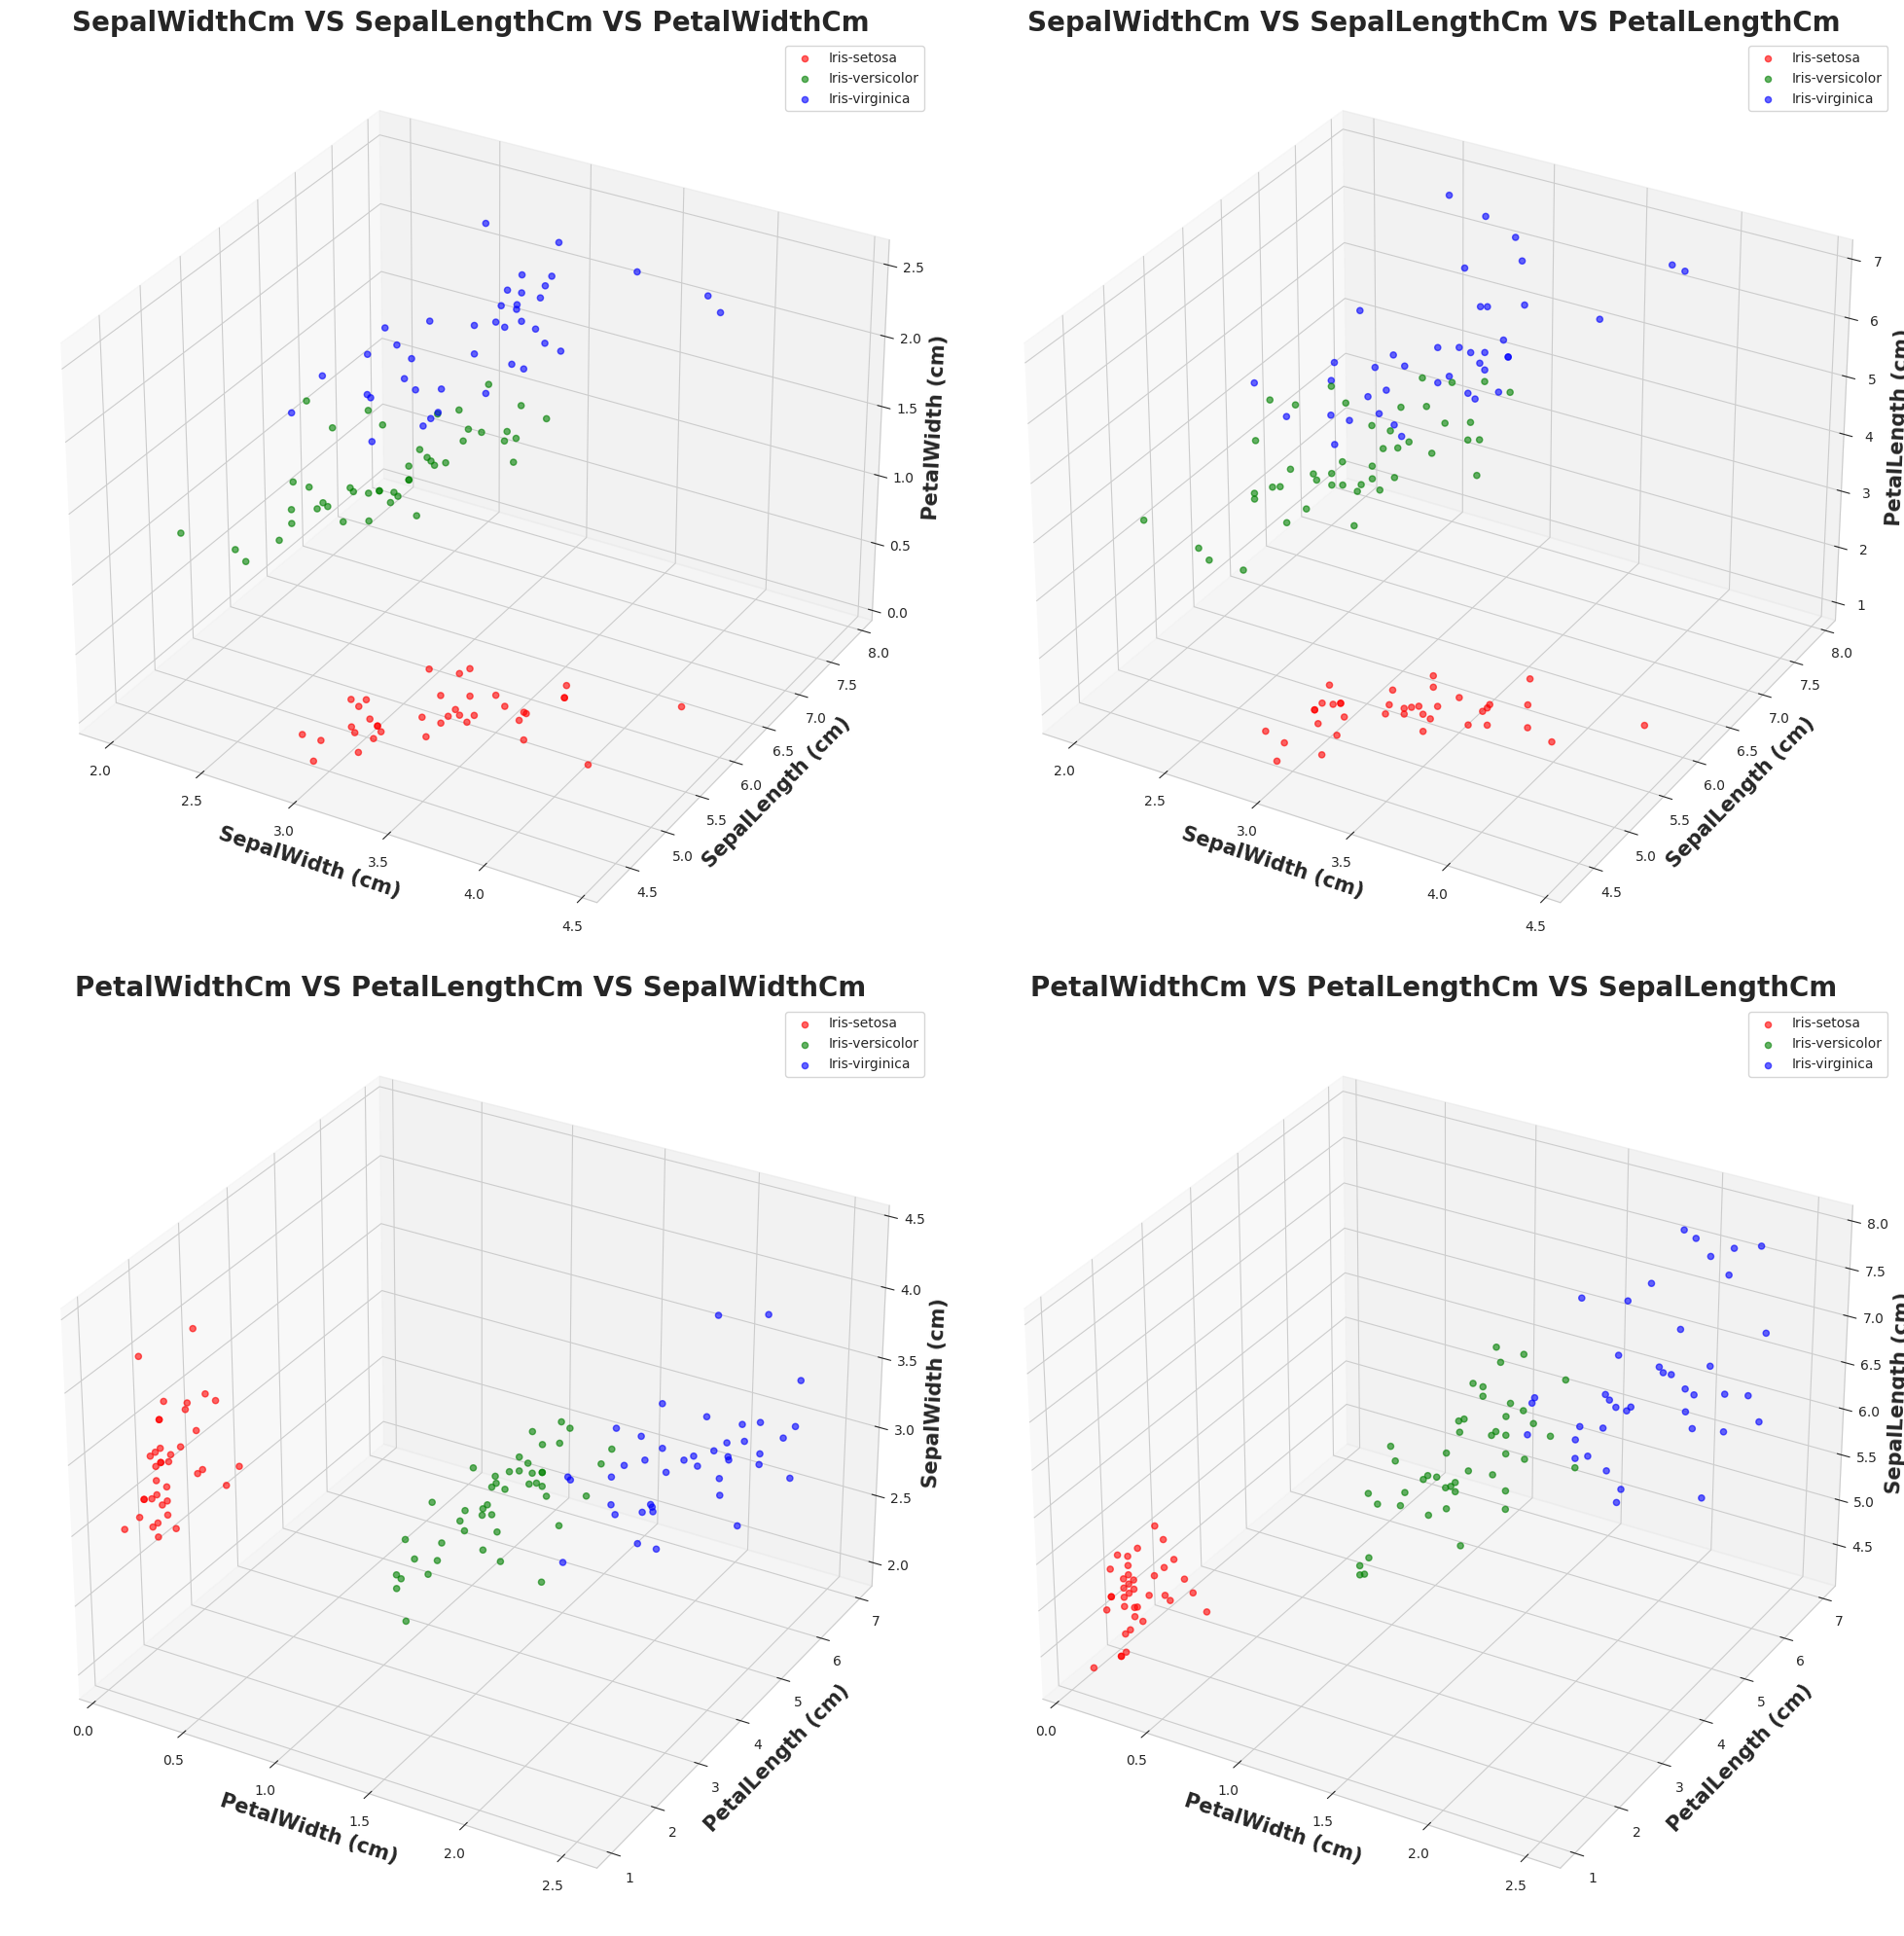

In [ ]:
fig = plt.figure(figsize=(20, 20))
def create_3d(ax, feature1, feature2, feature3):

    ax.scatter3D(df[df['Species'] == 'Iris-setosa'][feature1],
                 df[df['Species'] == 'Iris-setosa'][feature2],
                 df[df['Species'] == 'Iris-setosa'][feature3],
                 color='r', label='Iris-setosa', alpha=0.6)

    ax.scatter3D(df[df['Species'] == 'Iris-versicolor'][feature1],
                 df[df['Species'] == 'Iris-versicolor'][feature2],
                 df[df['Species'] == 'Iris-versicolor'][feature3],
                 color='g', label='Iris-versicolor', alpha=0.6)

    ax.scatter3D(df[df['Species'] == 'Iris-virginica'][feature1],
                 df[df['Species'] == 'Iris-virginica'][feature2],
                 df[df['Species'] == 'Iris-virginica'][feature3],
                 color='b', label='Iris-virginica', alpha=0.6)

    ax.set_title(f'{feature1} VS {feature2} VS {feature3}', fontweight='bold', size=20)
    ax.set_xlabel(feature1.replace('Cm', ' (cm)'), fontweight='bold', size=15)
    ax.set_ylabel(feature2.replace('Cm', ' (cm)'), fontweight='bold', size=15)
    ax.set_zlabel(feature3.replace('Cm', ' (cm)'), fontweight='bold', size=15)
    ax.legend()

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
create_3d(ax1, 'SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm')

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
create_3d(ax2, 'SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm')

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
create_3d(ax3, 'PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm')

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
create_3d(ax4, 'PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm')

plt.tight_layout()
plt.show()

# Checking Correlations

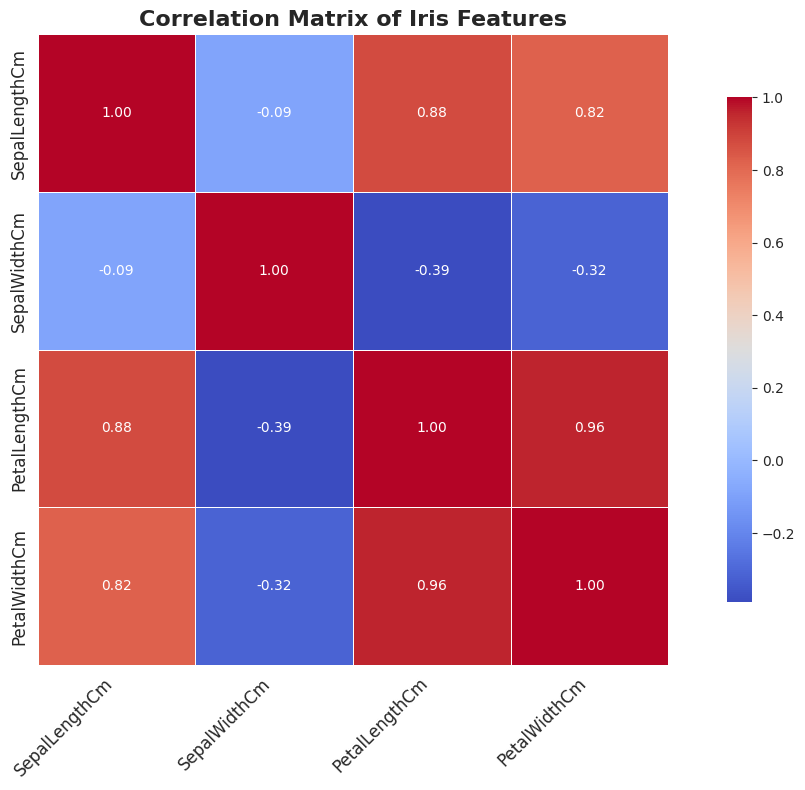

In [ ]:
my_df = df.select_dtypes(exclude=[object])

plt.figure(figsize=(12, 8))
sns.heatmap(
    my_df.corr(),
    cmap="coolwarm",
    square=True,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

plt.title("Correlation Matrix of Iris Features", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()